# New York city Jobs Analysis

## 1. Overview

The objective of this project is to analyse the New York city job posting dataset. 
* This dataset contains current job postings available on the City of New York’s official jobs site (http://www.nyc.gov/html/careers/html/search/search.shtml). 
* The data can be found here: https://www.kaggle.com/new-york-city/new-york-city-current-job-postings 
* The jobs are either internal postings available to city employees or external postings available to the general public are included.

## 2. Project high level architecture

dd

## 3. Import required libraries:

In [2]:
##Basic dataframe and Visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
##import text processing related libraries
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from gensim.models import word2vec


## 4. Data Exploration

### 4.1. **Read the input dataframe (file is saved as excel csv):**

In [5]:
df_jobs= pd.read_excel('jobs-dataset.csv')
df_jobs.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-11-26T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-11-26T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle DriverÃ¢â‚¬â„¢s License va...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle DriverÃ¢â‚¬â„¢s License va...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-11-26T00:00:00.000


### 4.2. Checking the dataframe & columns properties: 

In [6]:
df_jobs.shape

(3020, 28)

---> the dataset consists of 3020 rows with 28 columns <br>

**From the documentation descriptions the defintion of the fields are below:**
1. **Job ID**:  number that corresponds to and represents a job posting notice published
2. **Agency**: Name of the New York City agency (“agency” or “hiring agency”) 
3. **Posting Type**: Identifies whether a job posting is an Internal or External posting
4. **# Of Positions**: The total number of vacancies to be filled under the job ID listed.
5. **Business Title**: The "business title", or "office title", for the job posting listed.
6. **Civil Service Title**: The civil service title for the job posting listed. 
7. **Title Code No**: The Title Code Number (“Title Code No.”) that corresponds to the civil service title posted. 
8. **Level**: The civil service title assignment level that the posted position is being filled at. Civil service titles may have one (1) to four (4) assignment levels which correspond to the work duties assigned to that position.
9. **Job Category**: The occupational group in which the posted job belongs
10. **Full-Time/Part-Time indicator**:This denotes whether the job is a full time or part time employment. F Full time, P Part time
11. **Salary Range From**:The lowest salary on a job posting for a position within the salary band for the related civil service title.
12. **Salary Range To**:The highest salary on a job posting for a position within the salary band for the related civil service title.
13. **Salary Frequency**:The frequency of proposed salary.  Possible salary frequency values include “hourly”, “daily”, and “annual”. 
14. **Work Location**:The physical address for the agency listing the job posting. 
15. **Division/Work Unit**:The department/area within the hiring agency for the job position listed in a job posting.
16. **Job Description**:The description of the job responsibilities for the position listed in the job posting.
17. **Minimum Qual Requirements**:Minimum qualifications (“minimum qual”) required for the position listed in the job posting.
18. **Preferred Skills**:Additional, preferred skills desired by the hiring agency for a given position.
19. **Additional Information**:Additional information provided by the hiring agency.
20. **To Apply**:Instructions on how to apply for a given job vacancy.
21. **Hours/Shift**: Projected working hours, working days and shift information.
22. **Work Location 1**: Where applicable, additional work location details for the job vacancy.
23. **Recruitment Contact**: Where applicable, recruitment contact information is provided.
24. **Residency Requirement**: Residency requirements for a given job vacancy.
25. **Posting Date**: The date and time that a job vacancy was posted in MM/DD/YY format.
26. **Post Until**: The last date that a job vacancy will be posted; blank cells indicate job vacancy posts that will remain listed until the position is filled in MM/DD/YY format.
27. **Posting Updated**: The last date and time a job vacancy posting was modified in MM/DD/YY format.
28. **Process Date**: The date and time that the dataset created date to include the corresponding job vacancy posting in MM/DD/YY format.


In [7]:
#check the dataframe basic information:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         3020 non-null   int64  
 1   Agency                         3020 non-null   object 
 2   Posting Type                   3020 non-null   object 
 3   # Of Positions                 3020 non-null   int64  
 4   Business Title                 3020 non-null   object 
 5   Civil Service Title            3020 non-null   object 
 6   Title Code No                  3020 non-null   object 
 7   Level                          3020 non-null   object 
 8   Job Category                   3018 non-null   object 
 9   Full-Time/Part-Time indicator  2811 non-null   object 
 10  Salary Range From              3020 non-null   float64
 11  Salary Range To                3020 non-null   float64
 12  Salary Frequency               3020 non-null   o

In [8]:
#getting the numeric columns basic statistics
df_jobs.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,3020.000000,3020.000000,3020.000000,3020.000000,0.0
mean,383678.501987,2.424172,58140.495550,84325.707875,NaN
std,51779.379258,8.149189,26806.810446,43186.883961,NaN
min,87990.000000,1.000000,0.000000,10.360000,NaN
25%,378264.750000,1.000000,48535.000000,60990.000000,NaN
50%,402960.500000,1.000000,57944.000000,81535.000000,NaN
75%,415741.000000,1.000000,72476.000000,105000.000000,NaN
max,424117.000000,190.000000,218587.000000,234402.000000,NaN


In [9]:
## Check the missing values in the columns
missing_values = df_jobs.isnull().sum().sort_values(ascending=False)
missing_percent= (df_jobs.isnull().sum()/df_jobs.isnull().count()).sort_values(ascending=False)
df_jobs_missing = pd.concat([missing_values,missing_percent],axis=1, keys=['missing_values','missing_percent %'])
df_jobs_missing

,missing_values,missing_percent %
Recruitment Contact,3020,1.000000
Hours/Shift,2097,0.694371
Post Until,2048,0.678146
Work Location 1,1598,0.529139
Additional Information,1180,0.390728
Preferred Skills,443,0.146689
Full-Time/Part-Time indicator,209,0.069205
Minimum Qual Requirements,16,0.005298
Posting Updated,2,0.000662
Process Date,2,0.000662


In [10]:
## rename all columns to friendly name to use them in the later analysis

df_jobs_re = df_jobs.rename(columns={
    'Job ID':'job_id',
    'Posting Type':'posting_type',
    '# Of Positions':'num_position',
    'Business Title':'business_title',
    'Civil Service Title':'civil_ser_title',
    'Title Code No':'title_code_no',
    'Job Category':'job_category',
    'Full-Time/Part-Time indicator':'full_part_type',
    'Salary Range From':'salary_min',
    'Salary Range To':'salary_max',
    'Salary Frequency':'payment_cycle',
    'Work Location':'work_location',
    'Division/Work Unit':'department',
    'Job Description':'job_description',
    'Minimum Qual Requirements':'min_requirement',
    'Preferred Skills':'prefer_skills',
    'Additional Information':'additional_info',
    'To Apply':'to_apply',
    'Hours/Shift':'rotation',
    'Work Location 1':'Work_Location_extra',
    'Recruitment Contact':'contact',
    'Residency Requirement':'residency_requirement',
    'Posting Date':'post_date',
    'Post Until':'post_end',
    'Posting Updated':'updated_at',
    'Process Date':'process_date'
    
}
)

df_jobs_re.head()

,job_id,Agency,posting_type,num_position,business_title,civil_ser_title,title_code_no,Level,job_category,full_part_type,...,additional_info,to_apply,rotation,Work_Location_extra,contact,residency_requirement,post_date,post_end,updated_at,process_date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-11-26T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-11-26T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle DriverÃ¢â‚¬â„¢s License va...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle DriverÃ¢â‚¬â„¢s License va...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-11-26T00:00:00.000


In [11]:
## check any duplicated rows in the datset
sum(df_jobs_re.duplicated())

38

In [12]:
## remove duplicated rows
df_jobs_re.drop_duplicates(inplace=True)
sum(df_jobs_re.duplicated()), df_jobs_re.shape

(0, (2982, 28))

### 4.3 Columns Analysis Strategy

**As part of EDA, I am going to check each column based on below aspects:**
1. Missing value Verification & recommendation
2. Data types and distributions
3. Required transformation that can help in the analysis
4. Feature relevance and importance

**I have also classified the features into basic groups to analyse them togther:**
1. job_id: I found it duplicated so would investigate this part
2. Agency
3. posting_type
4. Postion information: num_position, business_title, civil_ser_title, title_code_no, department, job_category
5. renumeration: level, full_part_type, salary_min, salary_max, rotation,  
6. location: work_location, Work_Location_extra
7. job_information: job_description, min_requirement, prefer_skills, additional_info 
8. residency_requirement
9. posting date: post_date, post_end 


**The below features I found irrelevant and would exclude them from my analysis and will drop them in the data wrangling part:**
* Posting Updated
* Process Date
* To Apply
* Recruitment Contact


### 4.3.1 Column Job ID analysis

1. The Job ID has no missing values.
2. The Job ID is of type int64, let's have a look on the distribution

In [13]:
# confirm each value is unique to each posting
#it appears only 1688 jobs there yet the dataframe is 2982 so 1294 seems duplicated 
df_jobs_re.job_id.nunique()

1688

In [14]:
### Seems many posts got duplicated as internal and external so need to further check to prevent data quality issues
### I will perform more study on these 2 fields 'job_id','posting_type'
df_test=df_jobs_re[['job_id','posting_type']]

### I will construct new dataframe has all jobs ids and if it appears as internal and external then I will modify the field
### value to int_ext
df_test_count=df_test.groupby('job_id').count()
df_test_internal=df_test[df_test['posting_type']=='Internal']
df_test_external=df_test[df_test['posting_type']=='External']
len(df_test_count[df_test_count['posting_type']==1]),len(df_test_external),len(df_test_internal)

(395, 1302, 1680)

In [15]:
df_all=df_test_internal.merge(df_test_external,on='job_id').merge(df_test_count,on='job_id')
len(df_all)

1294

In [16]:
df_all.head()

,job_id,posting_type_x,posting_type_y,posting_type
0,132292,Internal,External,2
1,133921,Internal,External,2
2,167179,Internal,External,2
3,170989,Internal,External,2
4,187049,Internal,External,2


In [17]:
## Now I want to extract out all jobs from df_all as all duplicated and change the field value from the original dataframe
duplicated_jobs=df_all['job_id'].to_list()

#add duplication flag
#for on those jobs and change the posting_type to int_ext
df_jobs_re['flag_duplication']= df_jobs_re.apply(lambda x: int(x['job_id'] in duplicated_jobs), axis=1)
df_jobs_re['posting_type']= np.where((df_jobs_re['flag_duplication'] ==1),"int_ext",df_jobs_re['posting_type'])
df_jobs_re.head()

,job_id,Agency,posting_type,num_position,business_title,civil_ser_title,title_code_no,Level,job_category,full_part_type,...,to_apply,rotation,Work_Location_extra,contact,residency_requirement,post_date,post_end,updated_at,process_date,flag_duplication
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-11-26T00:00:00.000,0
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-11-26T00:00:00.000,0
2,132292,NYC HOUSING AUTHORITY,int_ext,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000,1
3,132292,NYC HOUSING AUTHORITY,int_ext,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000,1
4,133921,NYC HOUSING AUTHORITY,int_ext,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-11-26T00:00:00.000,1


In [18]:
## remove duplicated rows
df_jobs_re.drop_duplicates(inplace=True)
sum(df_jobs_re.duplicated()), df_jobs_re.shape

(0, (1693, 29))

In [19]:
## remove the flag column, I will remove the Job_ID as well
df_jobs_re.drop(['flag_duplication'], axis=1,inplace=True)
df_jobs_re.shape

(1693, 28)

### 4.3.2 Column Agency analysis

1. The Agency has no missing values.
2. The Agency is of type string, let's have a look on the distribution

In [20]:
df_jobs_re.Agency.nunique()

54

In [21]:
df_jobs_re.Agency.value_counts()

DEPT OF ENVIRONMENT PROTECTION    363
NYC HOUSING AUTHORITY             126
DEPARTMENT OF TRANSPORTATION      114
DEPT OF HEALTH/MENTAL HYGIENE      90
DEPT OF DESIGN & CONSTRUCTION      80
DEPT OF INFO TECH & TELECOMM       78
ADMIN FOR CHILDREN'S SVCS          77
LAW DEPARTMENT                     63
TAXI & LIMOUSINE COMMISSION        63
POLICE DEPARTMENT                  52
HOUSING PRESERVATION & DVLPMNT     49
DEPARTMENT OF CORRECTION           38
OFFICE OF MANAGEMENT & BUDGET      36
HRA/DEPT OF SOCIAL SERVICES        34
DEPT OF CITYWIDE ADMIN SVCS        34
DEPARTMENT OF INVESTIGATION        32
DEPT OF YOUTH & COMM DEV SRVS      32
DEPARTMENT OF BUSINESS SERV.       30
DEPARTMENT OF CITY PLANNING        27
OFFICE OF THE COMPTROLLER          27
NYC EMPLOYEES RETIREMENT SYS       24
DEPT OF PARKS & RECREATION         22
DEPARTMENT OF SANITATION           20
DEPARTMENT FOR THE AGING           20
FIRE DEPARTMENT                    18
HUMAN RIGHTS COMMISSION            15
DEPARTMENT O

<AxesSubplot:ylabel='Agency'>

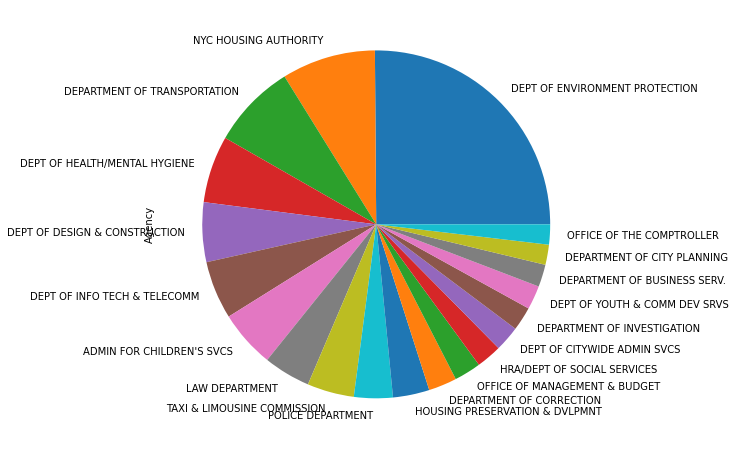

In [22]:
#plotting the agemcy distribution as pie chart for top 20
df_jobs_re.Agency.value_counts().head(20).plot(kind='pie',figsize=(8,8))

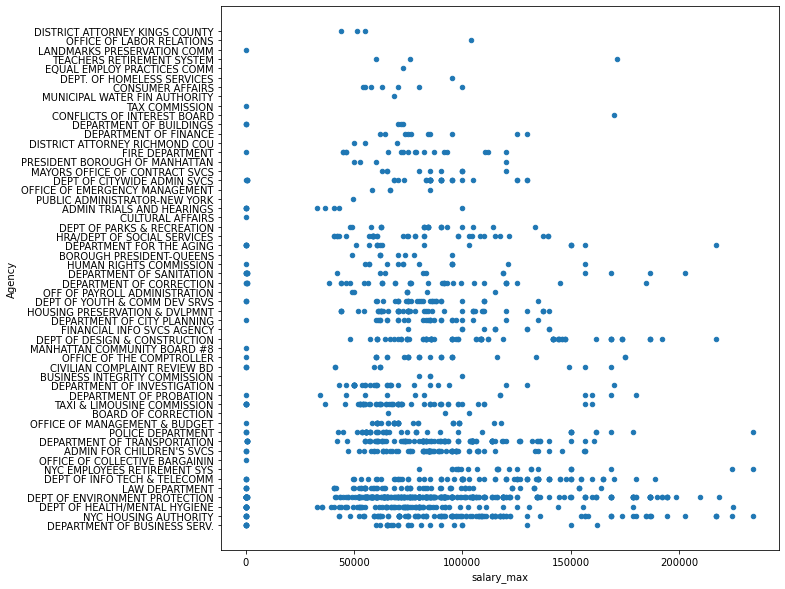

In [23]:
## Feature relevance
df_jobs_re.plot(y='Agency',x='salary_max', kind='scatter',figsize=(10,10));

The salary seems need many transformation to be  used in conjunction of other features. The general observation that the agency with more jobs are able to offer higher salaries.

### 4.3.3 Column posting_type analysis

In [24]:
## exploring the values of posting_type
df_jobs_re.posting_type.value_counts()

int_ext     1298
Internal     386
External       9
Name: posting_type, dtype: int64

--->It appears most of jobs are open to all people except 386 open for only internal people, we can then check those jobs characteristics

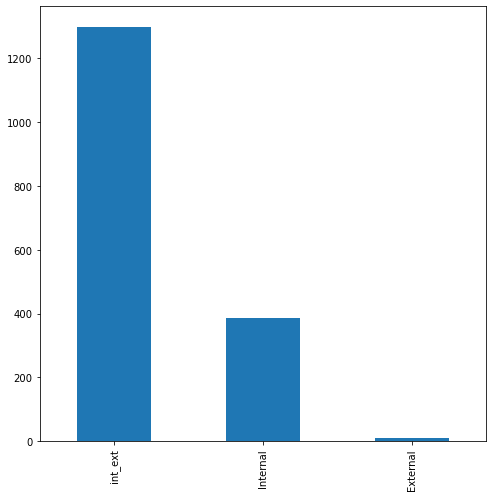

In [25]:
## plotting the distribution of posting_type
df_jobs_re.posting_type.value_counts().plot(kind='bar',figsize=(8,8));

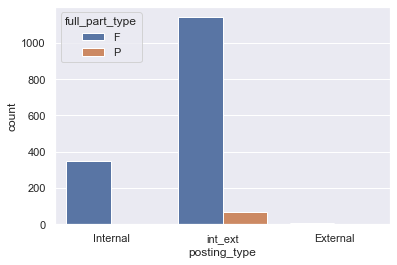

In [26]:
sns.set_theme(style="darkgrid")
sns.countplot(x='posting_type', data=df_jobs_re,hue="full_part_type");

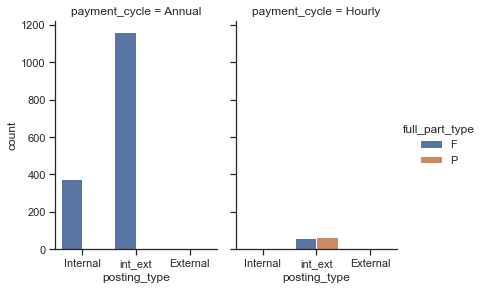

In [195]:
sns.catplot(x="posting_type", hue="full_part_type", col="payment_cycle",
                data=df_jobs_re, kind="count",
                height=4, aspect=.7);

From this we can see the posting opened as internal does not have any part time jobs nor hourly payment

### 4.3.5 Columns Level, full_part_type, salary_min, salary_max, rotation, payment_cycle   analysis

In [28]:
columns_jobs=['Level', 'full_part_type', 'salary_min', 'salary_max', 'rotation','payment_cycle']

In [29]:
for col in columns_jobs:
    print("Value analysis for column: {}".format(col))
    print("number of unique values: {}".format(df_jobs_re[col].nunique()))
    print(df_jobs_re[col].value_counts())

Value analysis for column: Level
number of unique values: 15
0     639
2     290
1     290
3     172
M1    100
M2     62
M3     57
4      33
M4     19
M5     17
M7      8
M6      2
4A      2
1B      1
4B      1
Name: Level, dtype: int64
Value analysis for column: full_part_type
number of unique values: 2
F    1499
P      72
Name: full_part_type, dtype: int64
Value analysis for column: salary_min
number of unique values: 527
52524.00     50
56990.00     46
75000.00     40
55416.00     36
63031.00     31
             ..
49591.00      1
39237.00      1
133569.36     1
71436.00      1
35.00         1
Name: salary_min, Length: 527, dtype: int64
Value analysis for column: salary_max
number of unique values: 656
85000.0     28
75000.0     26
83151.0     25
90000.0     24
100000.0    22
            ..
41675.0      1
49160.0      1
85143.0      1
51580.0      1
35.0         1
Name: salary_max, Length: 656, dtype: int64
Value analysis for column: rotation
number of unique values: 185
35 Hours   

In [194]:
## the full_part_type has few missing values
## if payment is anuual will consider is full-time and if payment is hourly I will consider it part time as approximaion
df_jobs_re['full_part_type']= np.where((df_jobs_re['full_part_type'].isnull()) & (df_jobs_re['payment_cycle'] =='Annual'),
                                       'F',df_jobs_re['full_part_type'])
df_jobs_re['full_part_type']= np.where((df_jobs_re['full_part_type'].isnull()) & (df_jobs_re['payment_cycle'] =='Hourly'),
                                       'P',df_jobs_re['full_part_type'])
df_jobs_re['full_part_type'].value_counts()

F    1614
P      79
Name: full_part_type, dtype: int64

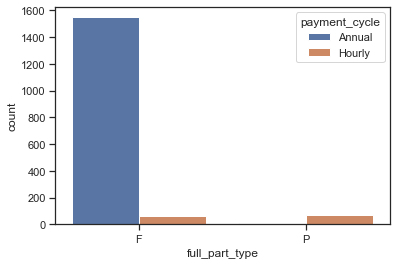

In [196]:
sns.countplot(x='full_part_type', data=df_jobs_re,hue="payment_cycle" );

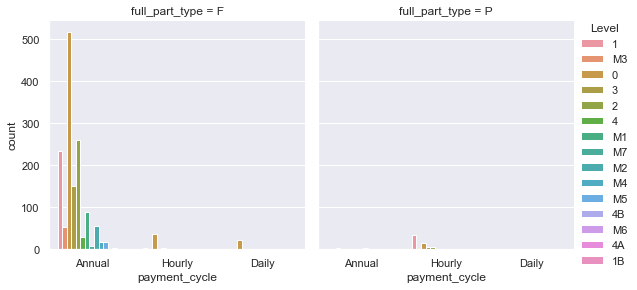

In [32]:
sns.catplot(x="payment_cycle", hue="Level", col="full_part_type",
                data=df_jobs_re, kind="count",
                height=4);

In [33]:
## the daily salaries are very few so will convert all to hourly
df_jobs_re['salary_min']= np.where((df_jobs_re['payment_cycle'] =='Daily'),df_jobs_re['salary_min']/8,df_jobs_re['salary_min'])
df_jobs_re['salary_max']= np.where((df_jobs_re['payment_cycle'] =='Daily'),df_jobs_re['salary_max']/8,df_jobs_re['salary_max'])

## replace the payment_cycle to hourly
df_jobs_re['payment_cycle'].replace('Daily','Hourly',inplace=True)



In [34]:
## I am going to calculate few features to compare the salaries

df_jobs_re['salary_avg']=(df_jobs_re['salary_min']+df_jobs_re['salary_max'])/2
df_jobs_re.head()

,job_id,Agency,posting_type,num_position,business_title,civil_ser_title,title_code_no,Level,job_category,full_part_type,...,to_apply,rotation,Work_Location_extra,contact,residency_requirement,post_date,post_end,updated_at,process_date,salary_avg
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-11-26T00:00:00.000,53945.0
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-11-26T00:00:00.000,111377.0
2,132292,NYC HOUSING AUTHORITY,int_ext,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000,53244.0
4,133921,NYC HOUSING AUTHORITY,int_ext,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-11-26T00:00:00.000,35.0
6,137433,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,Contract Analyst,PROCUREMENT ANALYST,12158,3,"Finance, Accounting, & Procurement",F,...,Apply online with a cover letter to https://a1...,NaN,"42-09 28th Street, Long Island City, NY",NaN,New York City residency is generally required ...,2013-12-09T00:00:00.000,NaN,2013-12-09T00:00:00.000,2019-11-26T00:00:00.000,67825.5


In [35]:
## I am going 2 add 2 more features to compare salaries on same scale
## so for hourly rate, I will calculate the yearly equivalent salary
## for yearly salary, I will calculate the hourly equivalent rate

df_jobs_re['yearly_salary_eq']= np.where(
    (df_jobs_re['payment_cycle'] =='Hourly'),
    df_jobs_re['salary_avg']*8*5*52,
    df_jobs_re['salary_avg'])

df_jobs_re['hourly_rate_eq']= np.where(
    (df_jobs_re['payment_cycle'] =='Annual'),
    df_jobs_re['salary_avg']/8/5/52,
    df_jobs_re['salary_avg'])

df_jobs_re.head()

,job_id,Agency,posting_type,num_position,business_title,civil_ser_title,title_code_no,Level,job_category,full_part_type,...,Work_Location_extra,contact,residency_requirement,post_date,post_end,updated_at,process_date,salary_avg,yearly_salary_eq,hourly_rate_eq
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-11-26T00:00:00.000,53945.0,53945.0,25.935096
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-11-26T00:00:00.000,111377.0,111377.0,53.546635
2,132292,NYC HOUSING AUTHORITY,int_ext,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000,53244.0,53244.0,25.598077
4,133921,NYC HOUSING AUTHORITY,int_ext,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-11-26T00:00:00.000,35.0,72800.0,35.000000
6,137433,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,Contract Analyst,PROCUREMENT ANALYST,12158,3,"Finance, Accounting, & Procurement",F,...,"42-09 28th Street, Long Island City, NY",NaN,New York City residency is generally required ...,2013-12-09T00:00:00.000,NaN,2013-12-09T00:00:00.000,2019-11-26T00:00:00.000,67825.5,67825.5,32.608413


C:\Users\Dina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


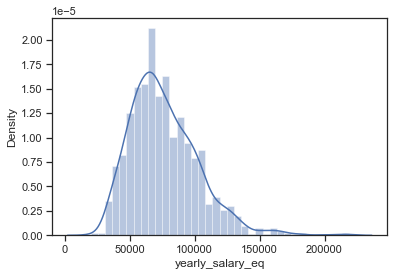

In [199]:
#Check the salary distribution

sns.distplot(df_jobs_re['yearly_salary_eq']);

In [200]:
## The salary seems having normal distribution, let's check more parameters

#skewness and kurtosis
print("Skewness: %f" % df_jobs_re['yearly_salary_eq'].skew())
print("Kurtosis: %f" % df_jobs_re['yearly_salary_eq'].kurt())

Skewness: 1.013140
Kurtosis: 1.988814


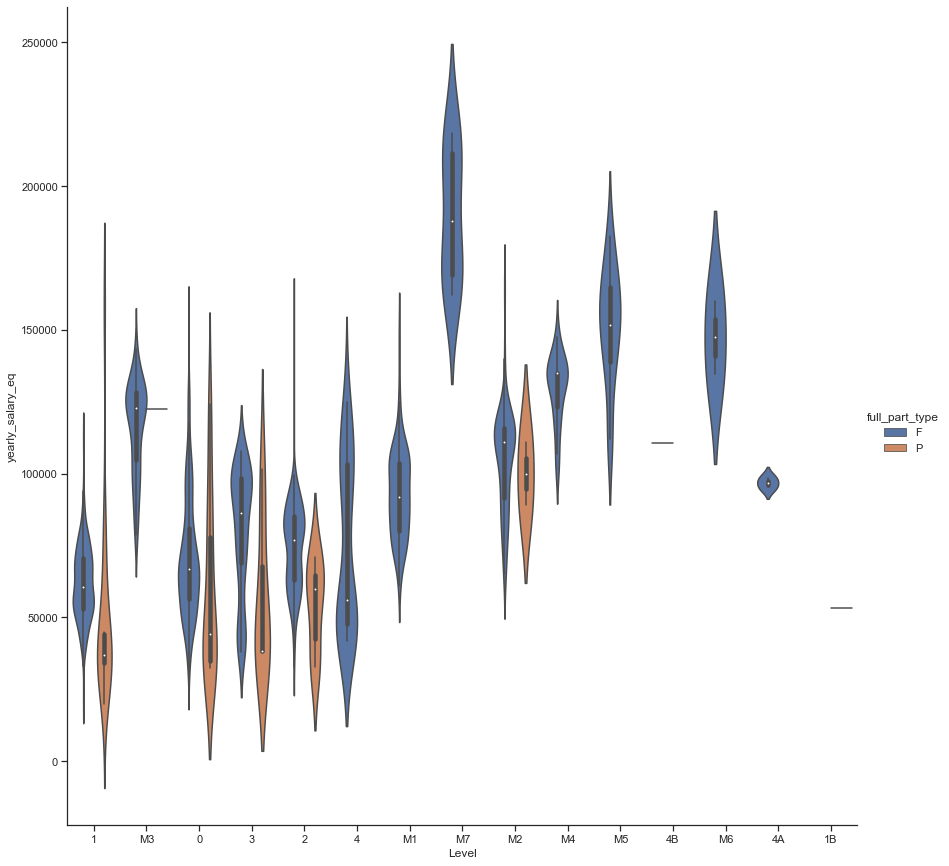

In [198]:
sns.set_theme(style="ticks")
sns.catplot(x="Level", y="yearly_salary_eq", hue="full_part_type",
                data=df_jobs_re, kind="violin",
                height=12);

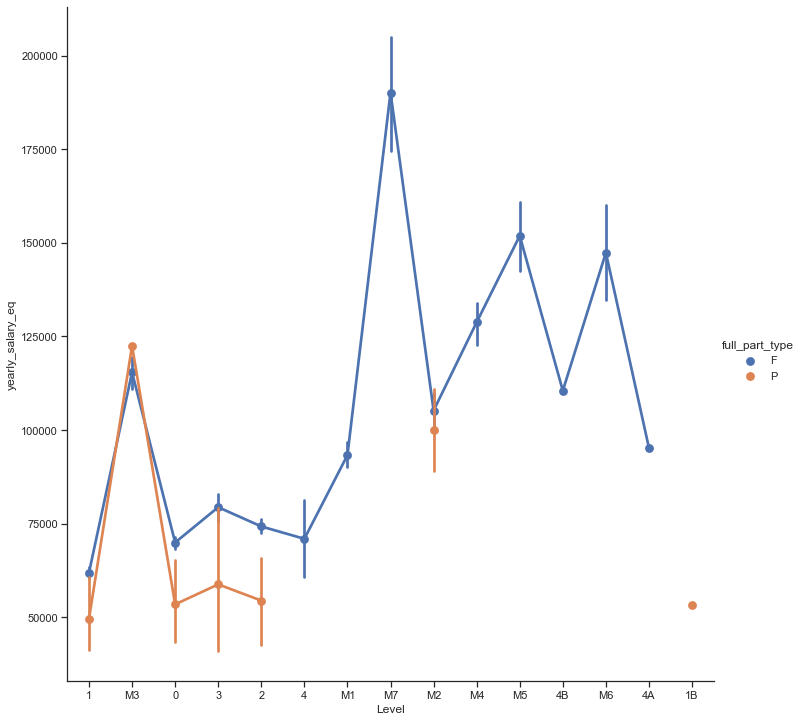

In [37]:
sns.catplot(x="Level", y="yearly_salary_eq", hue="full_part_type",
                data=df_jobs_re, kind="point",
                height=10);

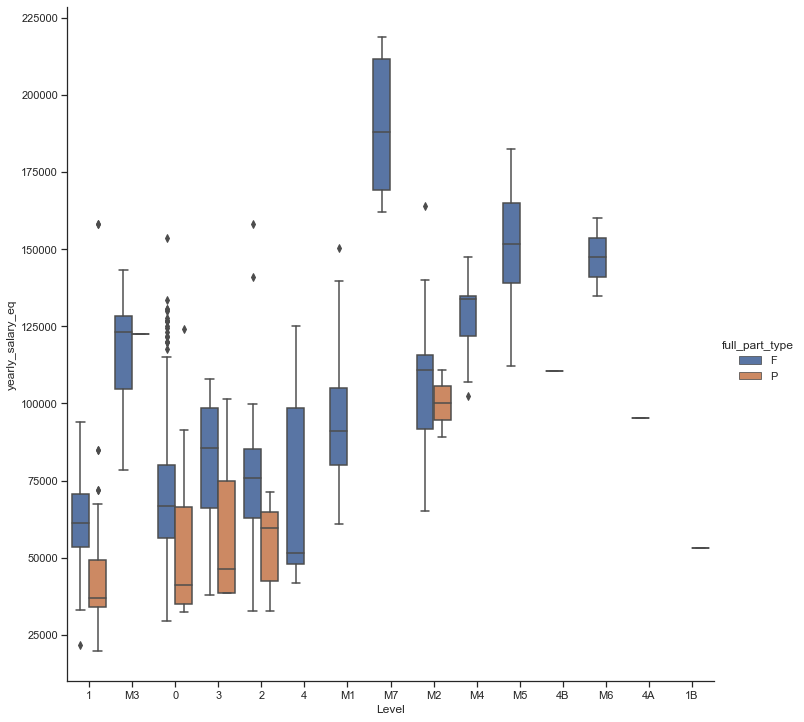

In [38]:
sns.catplot(x="Level", y="yearly_salary_eq", hue="full_part_type",
                data=df_jobs_re, kind="box",
                height=10);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


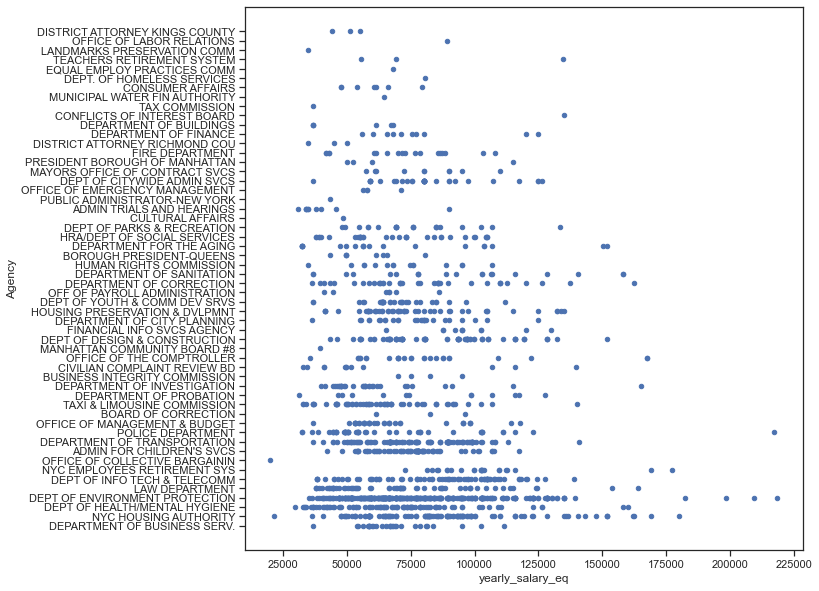

In [39]:
# I want to re-plot again the scatter plot of different salaries against agency, now the plot is more informative

df_jobs_re.plot(y='Agency',x='yearly_salary_eq', kind='scatter',figsize=(10,10));

### 4.3.4 Columns num_position, business_title, civil_ser_title, title_code_no, department, job_category  analysis

In [40]:
#analysing feature distribution
columns =['num_position', 'business_title', 'civil_ser_title', 'title_code_no', 'department', 'job_category']
for col in columns:
    print("Value analysis for column: {}".format(col))
    print("number of unique values: {}".format(df_jobs_re[col].nunique()))
    print(df_jobs_re[col].value_counts())
    

Value analysis for column: num_position
number of unique values: 32
1      1322
2       173
3        47
4        39
5        30
8        13
6        11
7         9
10        8
15        7
20        4
80        3
12        3
60        2
50        2
14        2
9         2
19        2
13        1
190       1
16        1
91        1
25        1
29        1
30        1
45        1
49        1
52        1
62        1
70        1
75        1
18        1
Name: num_position, dtype: int64
Value analysis for column: business_title
number of unique values: 1254
Project Manager                  17
Assistant Civil Engineer         15
Assistant General Counsel        14
Investigator                     12
Watershed Maintainer             11
                                 ..
Associate Program Manager         1
Agency Attorney II                1
Associate Project Manager III     1
DATA AND OPERATIONS ANALYST       1
Deputy Chief Prosecutor           1
Name: business_title, Length: 1254, dtype: int6

In [41]:
#It appears that 'civil_ser_title' &'title_code_no' are almost same information
df_ct=df_jobs_re[['civil_ser_title','title_code_no']]
df_ct.drop_duplicates(inplace=True)
len(df_ct)

<ipython-input-41-dc3f7bc577c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ct.drop_duplicates(inplace=True)


340

**So it is confirmed that column title_code_no is not adding any independant information and will be dropped**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


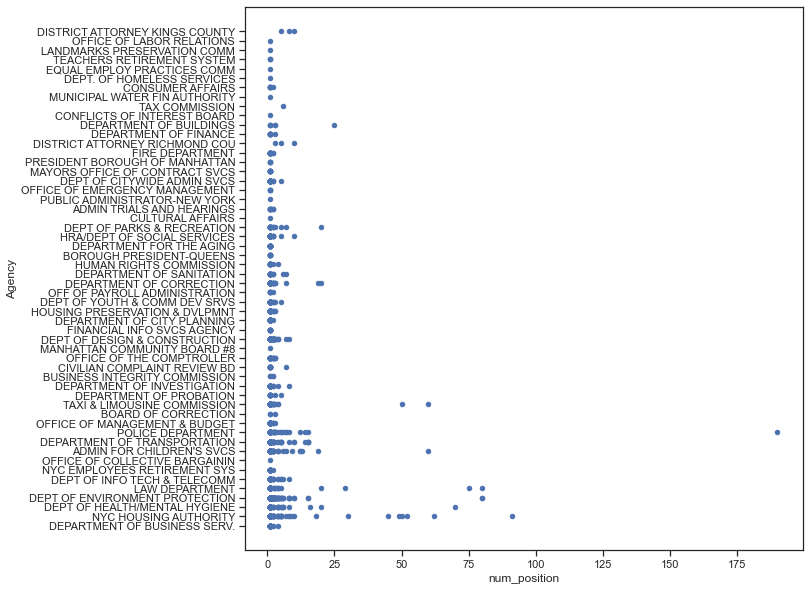

In [42]:
## Feature relevance between num_position and
df_jobs_re.plot(y='Agency',x='num_position', kind='scatter',figsize=(10,10));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


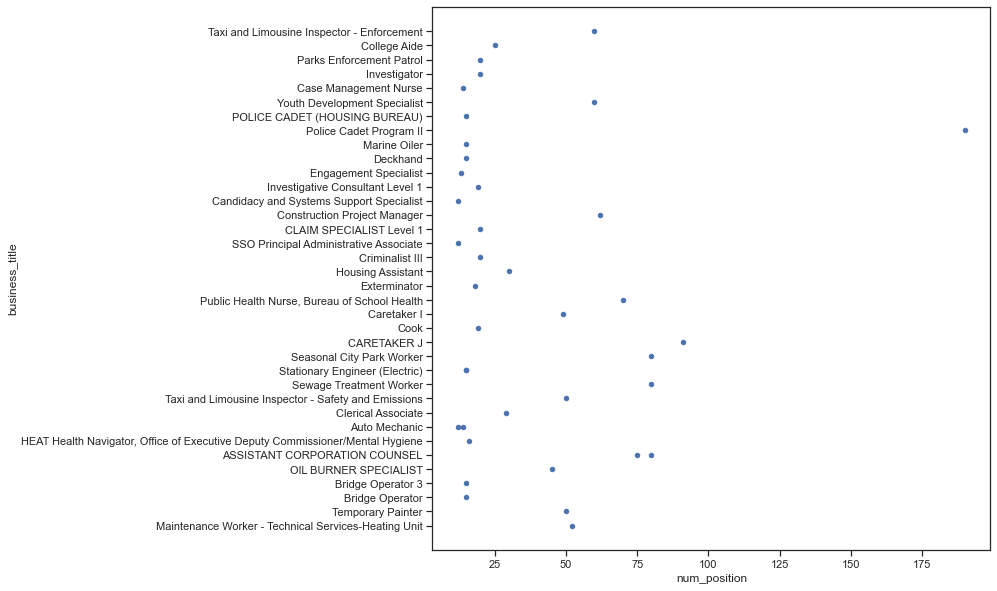

In [43]:
## I will have a quick look on the jobs posts where number of position more than 10
df_m = df_jobs_re[df_jobs_re['num_position']>10]
df_m.plot(y='business_title',x='num_position', kind='scatter',figsize=(10,10));

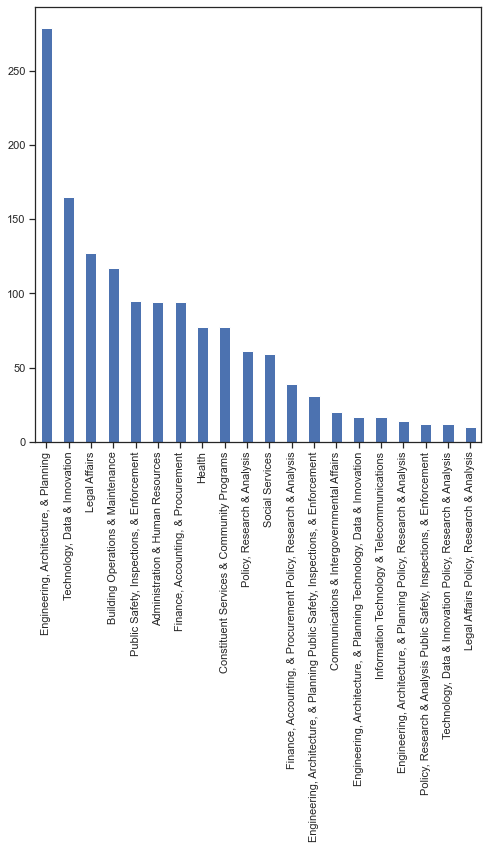

In [44]:
df_jobs_re.job_category.value_counts().head(20).plot(kind='bar',figsize=(8,8));

In [129]:
'''
The occupational group in which the posted job belongs, will be processes to new columns:
- Administration & Human Resources  --> O_HR
- Communications & Intergovernmental Affairs --> O_Communication
- Constituent Services & Community Programs --> O_Community_programs
- Engineering, Architecture, & Planning --> O_Engineering_Architecture
- Finance, Accounting, & Procurement --> O_finance
- Health --> O_Health
- Technology, Data & Innovation --> O_Technology
- Legal Affairs --> O_legal
- Building Operations & Maintenance --> O_Maintenance
- Policy, Research & Analysis --> O_Research
- Public Safety, Inspections, & Enforcement --> O_Public_Safety
- Social Services --> O_social_services

'''

df_jobs_re['O_HR'] = df_jobs_re['job_category'].str.extract(r'(Administration)')
df_jobs_re['O_HR']=df_jobs_re['O_HR'].map({'Administration':1,np.nan:0})

df_jobs_re['O_Communication'] = df_jobs_re['job_category'].str.extract(r'(Communications & Intergovernmental Affairs)')
df_jobs_re['O_Communication']=df_jobs_re['O_Communication'].map({'Communications & Intergovernmental Affairs':1,np.nan:0})

df_jobs_re['O_Community_programs'] =df_jobs_re['job_category'].str.extract(r'(Community)')
df_jobs_re['O_Community_programs'] =df_jobs_re['O_Community_programs'] .map({'Community':1,np.nan:0})

df_jobs_re['O_Engineering_Architecture']=df_jobs_re['job_category'].str.extract(r'(Engineering, Architecture, & Planning)')
df_jobs_re['O_Engineering_Architecture']=df_jobs_re['O_Engineering_Architecture'].map({'Engineering, Architecture, & Planning':1,np.nan:0})

df_jobs_re['O_finance'] = df_jobs_re['job_category'].str.extract(r'(Finance, Accounting, & Procurement)')
df_jobs_re['O_finance']=df_jobs_re['O_finance'].map({'Finance, Accounting, & Procurement':1,np.nan:0})

df_jobs_re['O_Health'] = df_jobs_re['job_category'].str.extract(r'(Health)')
df_jobs_re['O_Health'] = df_jobs_re['O_Health'].map({'Health':1,np.nan:0})

df_jobs_re['O_Technology'] = df_jobs_re['job_category'].str.extract(r'(Technology, Data & Innovation)')
df_jobs_re['O_Technology']=df_jobs_re['O_Technology'].map({'Technology, Data & Innovation':1,np.nan:0})

df_jobs_re['O_legal'] = df_jobs_re['job_category'].str.extract(r'(Legal)')
df_jobs_re['O_legal']= df_jobs_re['O_legal'].map({'Legal':1,np.nan:0})

df_jobs_re['O_Maintenance'] = df_jobs_re['job_category'].str.extract(r'(Maintenance)')
df_jobs_re['O_Maintenance']=df_jobs_re['O_Maintenance'].map({'Maintenance':1,np.nan:0})

df_jobs_re['O_Research'] = df_jobs_re['job_category'].str.extract(r'(Policy)')
df_jobs_re['O_Research']=df_jobs_re['O_Research'].map({'Policy':1,np.nan:0})

df_jobs_re['O_Public_Safety'] = df_jobs_re['job_category'].str.extract(r'(Public Safety, Inspections, & Enforcement)')
df_jobs_re['O_Public_Safety']=df_jobs_re['O_Public_Safety'].map({'Public Safety, Inspections, & Enforcement':1,np.nan:0})

df_jobs_re['O_social_services'] = df_jobs_re['job_category'].str.extract(r'(Social Services)')
df_jobs_re['O_social_services']=df_jobs_re['O_social_services'].map({'Social Services':1,np.nan:0})


In [148]:
columns_job_category = ['O_HR','O_Communication','O_Community_programs','O_Engineering_Architecture','O_finance',
          'O_Health','O_Technology','O_legal','O_Maintenance','O_Research','O_Public_Safety','O_social_services']


df_total

O_Engineering_Architecture    377
O_Research                    235
O_Technology                  222
O_Public_Safety               214
O_legal                       178
O_finance                     178
O_HR                          173
O_Maintenance                 162
O_Community_programs          145
O_social_services             112
O_Health                      107
O_Communication                56
dtype: int64

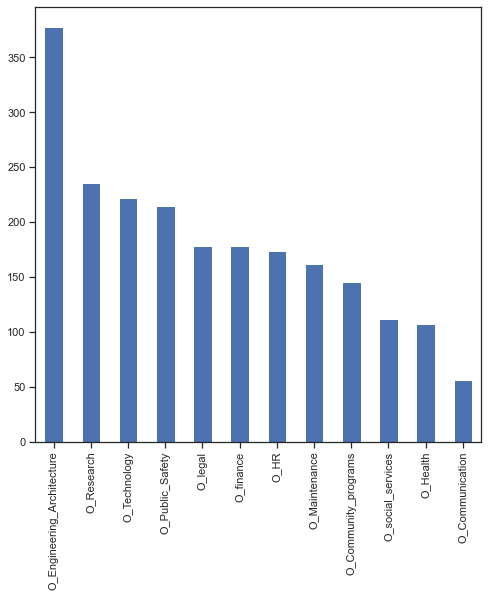

In [150]:
df_total.plot(kind='bar',figsize=(8,8));

In [139]:
print("required specialization of HR: {}".format(df_jobs_re[columns_job_category[0]].sum()))
print("required specialization of Communication: {}".format(df_jobs_re[columns_job_category[1]].sum()))
print("required specialization of Community_programs: {}".format(df_jobs_re[columns_job_category[2]].sum()))
print("required specialization of Engineering_Architecture: {}".format(df_jobs_re[columns_job_category[3]].sum()))
print("required specialization of finance: {}".format(df_jobs_re[columns_job_category[4]].sum()))
print("required specialization of Health: {}".format(df_jobs_re[columns_job_category[5]].sum()))
print("required specialization of Technology: {}".format(df_jobs_re[columns_job_category[6]].sum()))
print("required specialization of legal: {}".format(df_jobs_re[columns_job_category[7]].sum()))
print("required specialization of Maintenance: {}".format(df_jobs_re[columns_job_category[8]].sum()))
print("required specialization of Research: {}".format(df_jobs_re[columns_job_category[9]].sum()))
print("required specialization of Public_Safety: {}".format(df_jobs_re[columns_job_category[10]].sum()))
print("required specialization of social_services: {}".format(df_jobs_re[columns_job_category[11]].sum()))

required specialization of HR: 173
required specialization of Communication: 56
required specialization of Community_programs: 145
required specialization of Engineering_Architecture: 377
required specialization of finance: 178
required specialization of Health: 107
required specialization of Technology: 222
required specialization of legal: 178
required specialization of Maintenance: 162
required specialization of Research: 235
required specialization of Public_Safety: 214
required specialization of social_services: 112


In [121]:
df_jobs_re.head()

,job_id,Agency,posting_type,num_position,business_title,civil_ser_title,title_code_no,Level,job_category,full_part_type,...,O_Health,O_Technology,O_legal,O_Maintenance,O_Research,O_Public_Safety,O_social_services,min_requirement_tok,prefer_skills_tok,years_experience
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,0,0,0,0,0,0,0,baccalaureate degree accredited college two years experience community work community centered activities area related duties described high school graduation equivalent six years experience community work community centered activities area related duties described education experience equivalent however candidates must least one year experience described,excellent interpersonal organizational skills excellent analytic operational skills excellent writing editing skills knowledge government procurement processes information systems desirable foreign language skills plus,2.0
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,0,0,0,0,0,0,0,baccalaureate degree accredited college university five years full time paid experience acquired within last fifteen years supervisory administrative experience including handling business promotion urban economic problems least years must managerial executive capacity primary focus business promotion urban economic planning satisfactory equivalent combination education experience however candidates must years managerial executive experience described appropriate graduate study accredited college university may substituted general experience year year basis candidates must four year high school diploma equivalent approved state department education recognized accrediting organization,NaN,5.0
2,132292,NYC HOUSING AUTHORITY,int_ext,52,Maintenance Worker - Technical Services-Heating Unit,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,0,0,0,1,0,0,0,three years full time satisfactory experience mechanic journey person helper electrical trades mechanical trades construction maintenance buildings satisfactory combination education experience equivalent education may substituted experience basis one year full time training electrical mechanical construction trades trade school vocational high school approved stateã department education recognized accrediting organization may substituted six months experience described however candidates must minimum two years experience described,high school diploma ged cdl driver license excellent trouble shooting ability mechanical aptitude excellent analytical organizational skills ability trouble shoot various types vacuum heating equipment knowledge steam pneumatic heating systems steam hot water generating systems various types heat air water pumps knowledge maximo work order system,3.0
4,133921,NYC HOUSING AUTHORITY,int_ext,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,0,0,0,1,0,0,0,five years full time satisfactory experience painter acquired within last fifteen years least three years full time satisfactory experience painter acquired within last fifteen years sufficient full time satisfactory apprentice painter experience make total five years acceptable experience six months acceptable experience credited year apprentice painter experience,NaN,5.0
6,137433,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,Contract Analyst,PROCUREMENT ANALYST,12158,3,"Finance, Accounting, & Procurement",F,...,0,0,0,0,0,0,0,baccalaureate degree accredited college six months satisfactory full time professional experience procurement goods services construction construction related services professional technical administrative experience contract negotiation management associate degree completion semester credits accredited college months satisfactory full time professional experience described four year high school diploma educational equivalent two one half years satisfacto

In [47]:
### I will define new function to do previous job

def string_col_extract(df,old_col,new_col,search_string):
    df[new_col] =df[old_col].str.extract(fr'({search_string})')
    df[new_col]= df[new_col].map({search_string:1,np.nan:0})

### 4.3.6 Columns  work_location, Work_Location_extra analysis

In [48]:
columns_loc =['work_location', 'Work_Location_extra']

In [49]:
for col in columns_loc:
    print("Value analysis for column: {}".format(col))
    print("number of unique values: {}".format(df_jobs_re[col].nunique()))
    print(df_jobs_re[col].value_counts())

Value analysis for column: work_location
number of unique values: 236
96-05 Horace Harding Expway       141
59-17 Junction Blvd Corona Ny     116
30-30 Thomson Ave L I City Qns     80
55 Water St Ny Ny                  76
1 Centre St., N.Y.                 67
                                 ... 
OFC OF PUBLIC/PRIVATE PARTNERS      1
26 Central Avenue, S.I.,            1
Office Of The Chair                 1
Pennsylvania-Wortman                1
Bailey Ave-Fort Independence        1
Name: work_location, Length: 236, dtype: int64
Value analysis for column: Work_Location_extra
number of unique values: 244
30-30 Thomson Avenue, LIC, NY                                                          73
55 Water St Ny Ny                                                                      48
100 Gold Street                                                                        44
255 Greenwich Street                                                                   35
33 Beaver St, New York Ny    

### 4.3.7 Columns job_description, min_requirement, prefer_skills, additional_info  analysis

In [50]:
col_skills=['job_description', 'min_requirement', 'prefer_skills', 'additional_info']

In [51]:
for col in col_skills:
    print("Value analysis for column: {}".format(col))
    print("number of unique values: {}".format(df_jobs_re[col].nunique()))
    #print(df_jobs_re[col].value_counts())

Value analysis for column: job_description
number of unique values: 1626
Value analysis for column: min_requirement
number of unique values: 348
Value analysis for column: prefer_skills
number of unique values: 1286
Value analysis for column: additional_info
number of unique values: 682


**Seems the job description is unique per each job offering so I will drop from my analysis however can be used to drive some insights later as well as additional_info** 
<br>
<br>
**Now all other fields are series of string so need to check keywords in each feature**

In [52]:
#### get the top 25% salaries @ 75% distribution
df_jobs_re['yearly_salary_eq'].describe()

count      1693.000000
mean      76480.566109
std       26245.657418
min       19874.400000
25%       57818.000000
50%       71814.500000
75%       91500.000000
max      218587.000000
Name: yearly_salary_eq, dtype: float64

In [54]:
df_jobs_re.head(10)

,job_id,Agency,posting_type,num_position,business_title,civil_ser_title,title_code_no,Level,job_category,full_part_type,...,O_Community_programs,O_Engineering_Architecture,O_finance,O_Health,O_Technology,O_legal,O_Maintenance,O_Research,O_Public_Safety,O_social_services
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,0,0,0,0,0,0,0,0,0,0
2,132292,NYC HOUSING AUTHORITY,int_ext,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,0,0,0,0,0,0,1,0,0,0
4,133921,NYC HOUSING AUTHORITY,int_ext,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,0,0,0,0,0,0,1,0,0,0
6,137433,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,Contract Analyst,PROCUREMENT ANALYST,12158,3,"Finance, Accounting, & Procurement",F,...,0,0,1,0,0,0,0,0,0,0
7,138531,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Associate Chemist,ASSOCIATE CHEMIST,21822,2,"Health Public Safety, Inspections, & Enforcement",F,...,0,0,0,1,0,0,0,0,1,0
8,151131,NYC HOUSING AUTHORITY,External,1,Cost Estimating Manager,ADMINISTRATIVE STAFF ANALYST (,1002D,0,"Engineering, Architecture, & Planning",F,...,0,1,0,0,0,0,0,0,0,0
9,152738,LAW DEPARTMENT,Internal,1,Office Manager,CLERICAL ASSOCIATE,10251,3,Clerical & Administrative Support,F,...,0,0,0,0,0,0,0,0,0,0
10,160910,DEPT OF INFO TECH & TELECOMM,Internal,1,"Deputy Director, Audits and Accounts",ADM MANAGER-NON-MGRL FRM M1/M2,1002C,0,"Finance, Accounting, & Procurement",F,...,0,0,1,0,0,0,0,0,0,0
11,167179,NYC EMPLOYEES RETIREMENT SYS,int_ext,1,"CERTIFIED IT ADMINISTRATOR (WAN), Level 4",CERT. IT ADMINISTRATOR WAN,13642,4,Information Technology & Telecommunications,F,...,0,0,0,0,0,0,0,0,0,0


In [110]:
### This is one of best preprocessing function from 
#https://stackoverflow.com/questions/54396405/how-can-i-preprocess-nlp-text-lowercase-remove-special-characters-remove-numb

from nltk.tokenize import RegexpTokenizer
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    o=" ".join(filtered_words)
    return o

In [119]:
## applying some text processing

###### Minimum Qualification ######
df_jobs_re['min_requirement_tok']=df_jobs_re['min_requirement'].dropna().map(lambda x:preprocess(x)) 


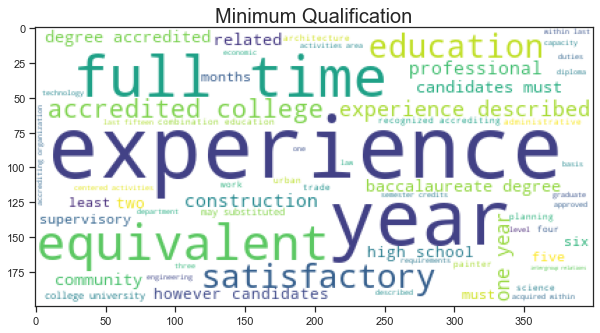

In [116]:
wc_min_requirement = WordCloud(background_color='white', max_words=200, stopwords=stopwords.words('english'))
plt.figure(figsize=(10,10))
plt.imshow(wc_min_requirement.generate_from_text(str(df_jobs_re['min_requirement_tok'])))
title = plt.title('Minimum Qualification', fontsize=20)

In [117]:
## applying some text processing

###### prefer_skills ######

df_jobs_re['prefer_skills_tok']=df_jobs_re['prefer_skills'].dropna().map(lambda x:preprocess(x))


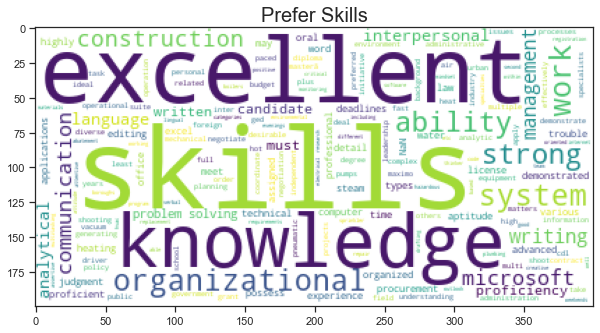

In [118]:
wc_prefer_skills = WordCloud(background_color='white', max_words=200, stopwords=stopwords.words('english'))
plt.figure(figsize=(10,10))
plt.imshow(wc_prefer_skills.generate_from_text(str(df_jobs_re['prefer_skills_tok'])))
title = plt.title('Prefer Skills', fontsize=20)

## Analysis for top paid jobs:

In [132]:
### check the skills for top paid jobs which above the 75% distribution

df_top_jobs = df_jobs_re[df_jobs_re['yearly_salary_eq']>91500]

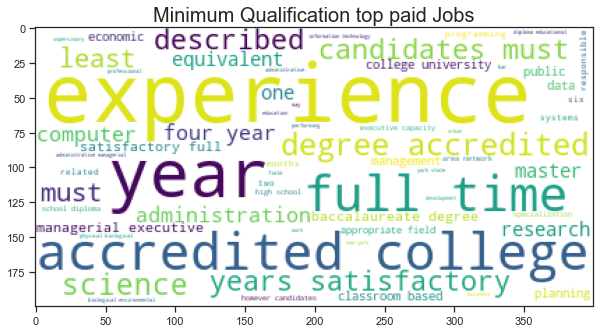

In [176]:
plt.figure(figsize=(10,10))
plt.imshow(wc_min_requirement.generate_from_text(str(df_top_jobs['min_requirement_tok'])))
title = plt.title('Minimum Qualification top paid Jobs', fontsize=20)



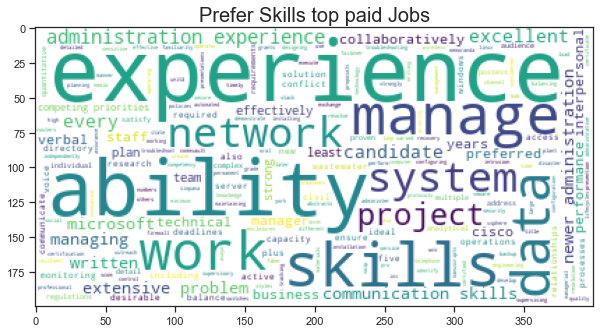

In [178]:
plt.figure(figsize=(10,10))
plt.imshow(wc_top_skills.generate_from_text(str(df_top_jobs['prefer_skills_tok'])))
title = plt.title('Prefer Skills top paid Jobs', fontsize=20)

In [ ]:
### I will define new function to do previous job

def string_col_extract(df,old_col,new_col,search_string):
    df[new_col] =df[old_col].str.extract(fr'({search_string})')
    df[new_col]= df[new_col].map({search_string:1,np.nan:0})

In [174]:
#df_top_jobs.drop(['exp_skill','data_skill','manage_skill','admin_skill'], axis=1,inplace=True)

In [179]:
### I will put the top skills in special string to add new column
string_col_extract(df_top_jobs,'min_requirement','exp_skill','experience')
string_col_extract(df_top_jobs,'min_requirement','edu_skill','education')
string_col_extract(df_top_jobs,'min_requirement','communication_skill','communication')
string_col_extract(df_top_jobs,'min_requirement','computer_skill','computer')
df_top_jobs.head()

<ipython-input-47-2021eb9fb696>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] =df[old_col].str.extract(fr'({search_string})')
<ipython-input-47-2021eb9fb696>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col]= df[new_col].map({search_string:1,np.nan:0})


,job_id,Agency,posting_type,num_position,business_title,civil_ser_title,title_code_no,Level,job_category,full_part_type,...,O_Public_Safety,O_social_services,min_requirement_tok,prefer_skills_tok,years_experience,top_skills,exp_skill,edu_skill,communication_skill,computer_skill
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,0,0,baccalaureate degree accredited college university five years full time paid experience acquired within last fifteen years supervisory administrative experience including handling business promotion urban economic problems least years must managerial executive capacity primary focus business promotion urban economic planning satisfactory equivalent combination education experience however candidates must years managerial executive experience described appropriate graduate study accredited college university may substituted general experience year year basis candidates must four year high school diploma equivalent approved state department education recognized accrediting organization,NaN,5.0,0,1,1,0,0
8,151131,NYC HOUSING AUTHORITY,External,1,Cost Estimating Manager,ADMINISTRATIVE STAFF ANALYST (,1002D,0,"Engineering, Architecture, & Planning",F,...,0,0,master degree accredited college economics finance accounting business public administration human resources management management science operations research organizational behavior industrial psychology statistics personnel administration labor relations psychology sociology human resources development political science urban studies closely related field two years satisfactory full time professional experience one combination following working budget large public private concern budget administration accounting economic financial administration fiscal economic research management methods analysis operations research organizational research program evaluation personnel public administr...,five years managerial supervisory experience excellent verbal written communication skills ability work collaboratively others ability perform detailed work time sensitive deadlines,2.0,1,1,0,0,0
11,167179,NYC EMPLOYEES RETIREMENT SYS,int_ext,1,"CERTIFIED IT ADMINISTRATOR (WAN), Level 4",CERT. IT ADMINISTRATOR WAN,13642,4,Information Technology & Telecommunications,F,...,0,0,baccalaureate degree accredited college two years satisfactory full time classroom based experience wide area network planning design configuration installation troubleshooting integration performance monitoring maintenance enhancement security management four year high school diploma educational equivalent six years satisfactory full time classroom based information technology experience least years must described masters degree computer science related field accredited college may substitute one year experience however candidates must least one year satisfactory classroom based full time information technology experience described,minimum years experience planning designing configuring installing troubleshooting maintaining data voice networks experience performance capacity monitoring required cisco certified network professional certification preferred familiarity cisco network technology routers switches ios firewall asa intrusion prevention system secure access control system fiber channel avaya telephone systems strongly preferred experience voice voip disaster recovery automated failover resilient networks performance capacity monitoring load balancing network security wireless networks desirable,2.0,1,1,1,0,1
29,192756,DEPARTMENT OF TRANSPORTATION,int_ext,1,Systems Administrator - Computer Software,CERTIFIED IT ADMINISTRATOR LAN,13641,3,Information Technology & Telecommunications,F,...,0,0,professional vendor certification local area network administration required position filled addition candidates must following baccalaureate degree accredited college two years satisfactory full time classroom

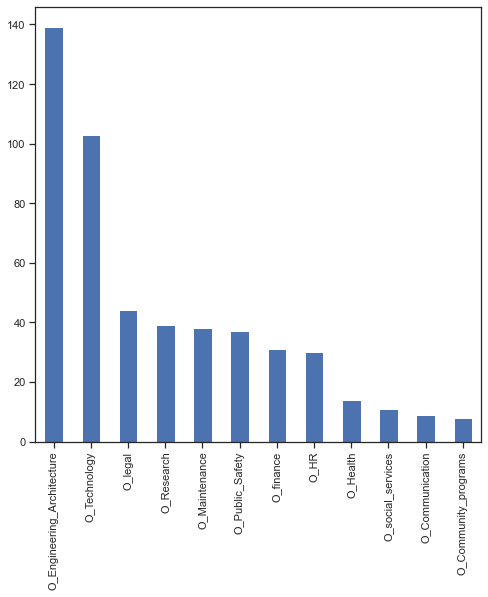

In [187]:
#df_total=df_jobs_re[columns_job_category].sum().sort_values(ascending=False)
df_exp=df_top_jobs[df_top_jobs['exp_skill']==1].sum()[columns_job_category].sort_values(ascending=False)
df_exp.plot(kind='bar',figsize=(8,8));

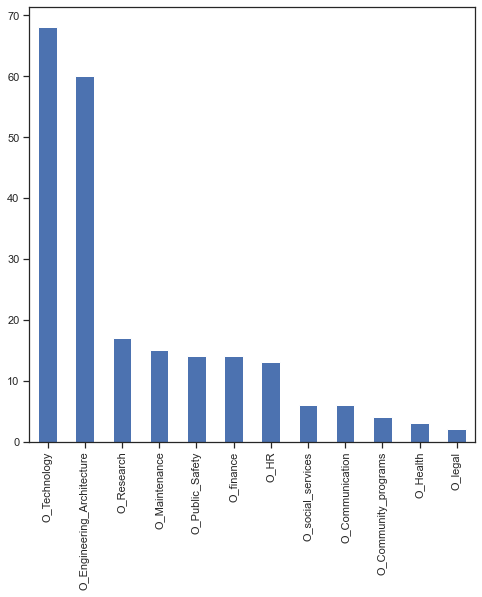

In [188]:
df_edu=df_top_jobs[df_top_jobs['edu_skill']==1].sum()[columns_job_category].sort_values(ascending=False)
df_edu.plot(kind='bar',figsize=(8,8));

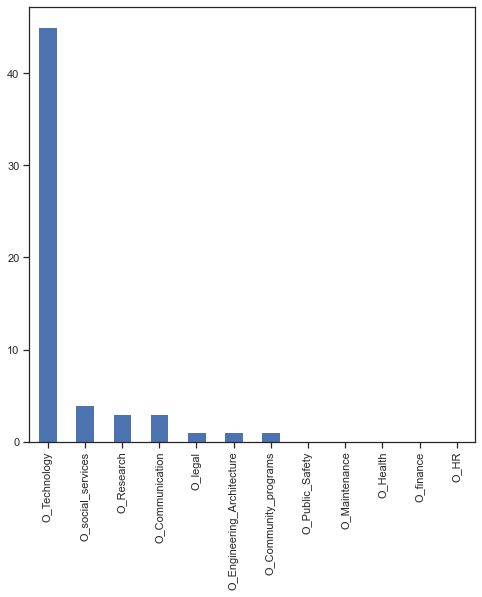

In [189]:
df_communication=df_top_jobs[df_top_jobs['communication_skill']==1].sum()[columns_job_category].sort_values(ascending=False)
df_communication.plot(kind='bar',figsize=(8,8));

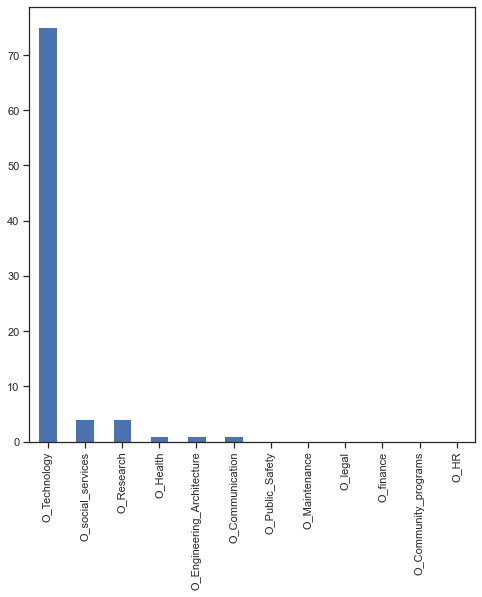

In [190]:
df_computer=df_top_jobs[df_top_jobs['computer_skill']==1].sum()[columns_job_category].sort_values(ascending=False)
df_computer.plot(kind='bar',figsize=(8,8));


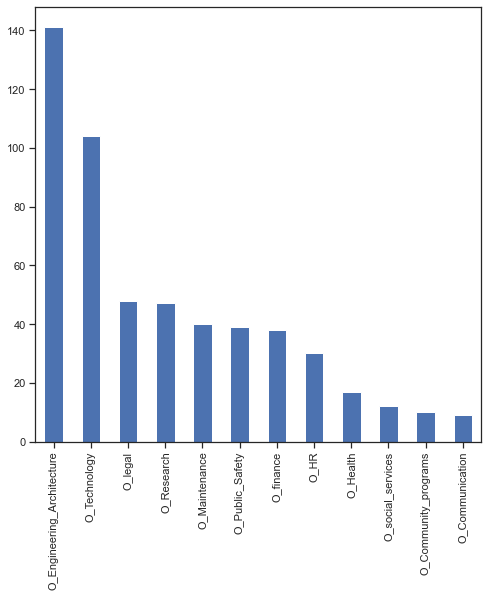

In [152]:
df_total_top_skills.plot(kind='bar',figsize=(8,8));

In [57]:
## extract the years of expereince
df_jobs_re['years_experience'] = df_jobs_re['min_requirement'].str.extract(r'(\w+)\syears.+experience')
df_jobs_re['years_experience'] = df_jobs_re['years_experience'].str.lower()
df_jobs_re['years_experience'].value_counts()

two           468
three         313
five          204
four          188
six            35
half           24
additional     14
4              11
seven          10
eight           6
ten             5
3               3
10              2
more            2
5               1
2               1
6               1
Name: years_experience, dtype: int64

In [58]:
# I want to have deeper look on 'half' occurence 
pd.set_option('display.max_colwidth', 700)
df_jobs_re[df_jobs_re['years_experience']=='half']['min_requirement'].head()

6      1. A baccalaureate degree from an accredited college and six months of satisfactory full-time professional experience in procurement of goods, services, construction or construction-related services, or professional, technical or administrative experience in contract negotiation/management; or  2. An associate degree or completion of 60 semester credits from an accredited college, and 18 months of satisfactory, full-time professional experience as described in Ã¢â‚¬Å“1Ã¢â‚¬Â above; or  3. A four-year high school diploma or its educational equivalent and two and one-half years of satisfactory full time professional experience as described in Ã¢â‚¬Å“1Ã¢â‚¬Â above; or  4. A combination of...
276    1. A baccalaureate degree from an accredited college and six months of satisfactory full-time professional experience in procurement of goods, services, construction or construction-related services, or professional, technical or administrative experience in contract negotiation/manage

In [59]:
# I want to have deeper look on 'additional' occurence 
pd.set_option('display.max_colwidth', 700)
df_jobs_re[df_jobs_re['years_experience']=='additional']['min_requirement'].head()

530     1. A master's degree from an accredited college or university  in economics, statistics, finance, management, business administration, public administration, public policy or related field; or    2. A baccalaureate degree from an accredited college or university, including or supplemented by 24 semester credits in one or more of the course areas of economics, statistics,  finance, management, mathematics, business administration, public administration, and public policy, 12 semester credits of which must have been in economics; and one year of satisfactory full-time experience in one or more of the  fields of finance; economic, fiscal or statistical research; policy analysis; or quantita...
1095    1. A baccalaureate degree from an accredited college or university, plus two (2) years of experience in social work, employment counseling, group work, rehabilitation, counseling or related activities; or     2. A masterÃ¢â‚¬â„¢s degree or 30 credits of graduate study in sociology, p

In [60]:
years = {
    'half':0.5,'additional':1,'more':2,'two':2,'2':2,'3':3,'three':3,'4':4,'four':4,
    'five':5,'5':5,'six':6,'seven':7,'eight':8,'10':10,'ten':10    
}
df_jobs_re['years_experience'] = df_jobs_re['years_experience'].str.lower().map(years)
df_jobs_re['years_experience'].value_counts()

2.0     471
3.0     316
5.0     205
4.0     199
6.0      35
0.5      24
1.0      14
7.0      10
10.0      7
8.0       6
Name: years_experience, dtype: int64

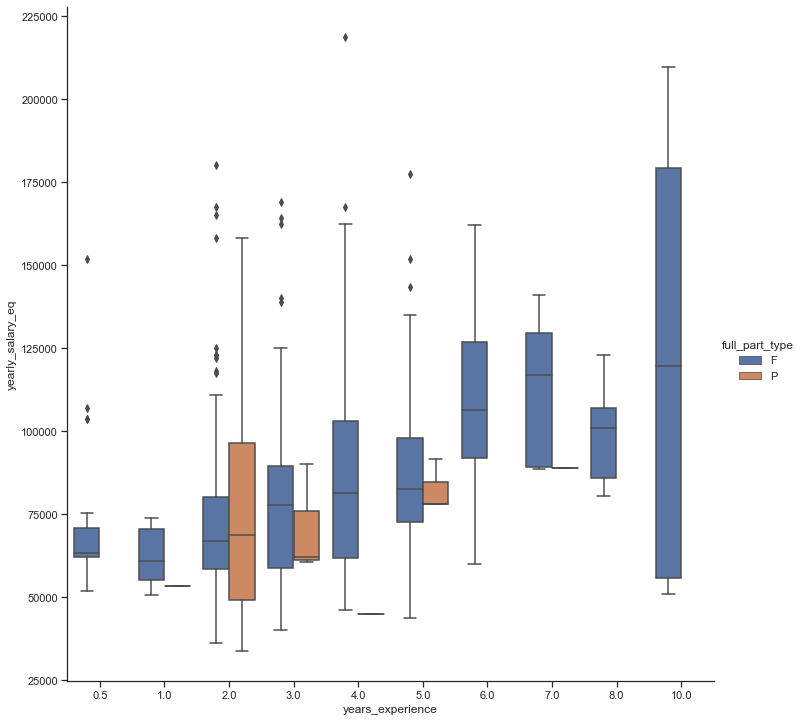

In [61]:
sns.catplot(x="years_experience", y="yearly_salary_eq", hue="full_part_type",
                data=df_jobs_re, kind="box",
                height=10);

### 4.3.8 Columns residency_requirement analysis

In [ ]:
###No required in current analysis

### 4.3.9 Columns post_date, post_end analysis

In [120]:
###No required in current analysis

## 3. Data Wrangling & Preprocessing

**Based on data exploration findings, below transformation will be done:**
1. drop the columns: job_id, title_code_no, updated_at, process_date, to_apply, contact   
2. fill missing values in columns: full_part_type (done in EDA)
3. create the yearly and hourly equivalent salary (done in EDA)

### Step1: drop the columns

In [ ]:
### dropping all columns not going to be used in the ML part
cleaned_df=df_jobs_re.copy()
cleaned_df=cleaned_df.drop(['job_id','title_code_no','updated_at','process_date','to_apply','contact'], axis=1,inplace=True)
df_jobs_re.shape

## 4. Feature engineering & Visualization

**Below are the basic data engineering required:**
1. Convert to one hot encoding:
2. New features were created in the EDA
3. #
4. #

In [ ]:
#create the skills feature (was calculate before for top jobs only)
string_col_extract(cleaned_df,'min_requirement','exp_skill','experience')
string_col_extract(cleaned_df,'min_requirement','edu_skill','education')
string_col_extract(cleaned_df,'min_requirement','communication_skill','communication')
string_col_extract(cleaned_df,'min_requirement','computer_skill','computer')

## 5. Data modeling using Machine learning

### 1. Clustering Model

### 2. Logistic regression Model

### 3. Decision tree  Model

## 6. Models evaluation and comparison

In [ ]:
#histogram
sns.distplot(df_train['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())